Importing all the required libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

This will be used to get rid of the warnings that we get while plotting the plots

In [2]:
import warnings
warnings.filterwarnings("ignore")

Reading the haberman csv file. Using the header variable set to None, so that it doesn't consider the first row as column names

In [3]:
haberman=pd.read_csv('haberman.csv',header=None)

To get the number of features and rows of the dataset

In [4]:
haberman.shape

(306, 4)

To view the columns of the dataset. You can see that the column names are showing as indices

In [5]:
haberman.columns

Int64Index([0, 1, 2, 3], dtype='int64')

Viewing the first five columns of the dataset using the head() method

In [6]:
haberman.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Setting the Column names so that they are readable

In [7]:
haberman.columns=['Age','Year','Nodes','Survival_Status']

Dataset with new column names

In [8]:
haberman.head()

,Age,Year,Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Setting the Year column as string, so that we can add 19 to the value, making it readable while using plots

In [9]:
haberman['Year']=haberman['Year'].astype(str)
haberman['Year']='19'+haberman['Year']
haberman.head()

,Age,Year,Nodes,Survival_Status
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


Setting the Year column to INT

In [10]:
haberman['Year']=haberman['Year'].astype(int)

Getting the number of records of each Survival Status

In [11]:
haberman['Survival_Status'].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

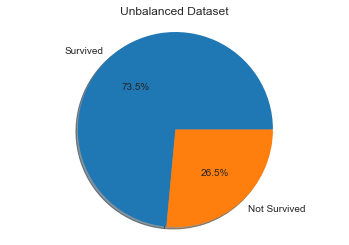

In [26]:
sizes=[haberman['Survival_Status'].value_counts()[1],haberman['Survival_Status'].value_counts()[2]]
labels=['Survived','Not Survived']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Unbalanced Dataset')
plt.show()

It is unbalanced dataset as the values are differ a lot

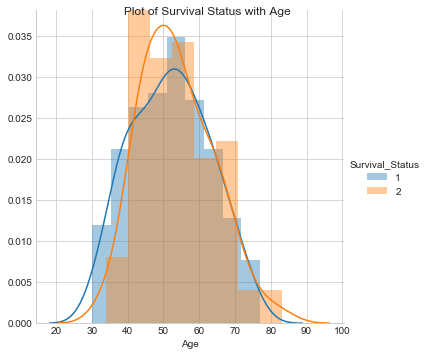

In [35]:
g=sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();

g.fig.suptitle('Plot of Survival Status with Age')
plt.show();

By plotting the PDF using Age variable, we are not able to classify between the Survival Statuses

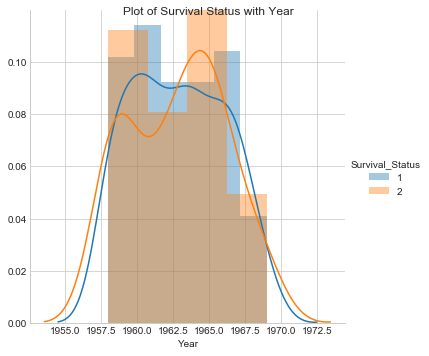

In [36]:
h=sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Year") \
   .add_legend();
h.fig.suptitle('Plot of Survival Status with Year')
plt.show();

By plotting the PDF based on Year, we are not able to classify the status as both are overlapping

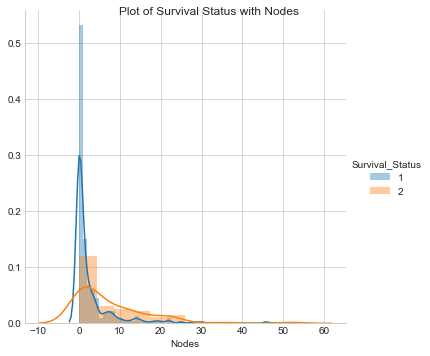

In [37]:
i=sns.FacetGrid(haberman, hue="Survival_Status", size=5) \
   .map(sns.distplot, "Nodes") \
   .add_legend();
i.fig.suptitle('Plot of Survival Status with Nodes')
plt.show();

By plotting the PDF based on Nodes, we are some what able to classify the status better than using Year and Age variables. So we will use the Nodes variable for exploring the data furter

Splitting the dataset into longer and shorter datasets based on the Survival Status

In [15]:
haberman_longer = haberman.loc[haberman["Survival_Status"] == 1];
haberman_shorter = haberman.loc[haberman["Survival_Status"] == 2];

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


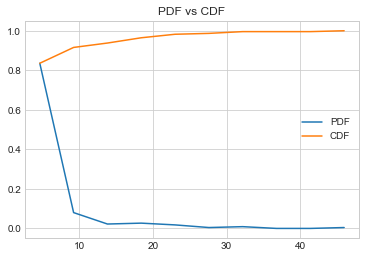

In [40]:
counts, bin_edges = np.histogram(haberman_longer['Nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF vs CDF')

plt.gca().legend(('PDF','CDF'))


If we see the CDF, we can find that 83.5% of the records have less than 10 Nodes.

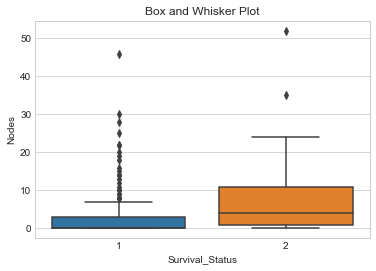

In [46]:
sns.boxplot(x='Survival_Status',y='Nodes', data=haberman).set_title('Box and Whisker Plot')
plt.show()

If we can classify that if the number of nodes are less than or equal to 4, then the person lives more than five years. This however has a slight error that 25 percentiles of the Survival Status of 2 are misclassified as Survival Status 1

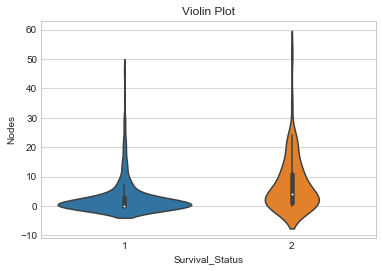

In [48]:
sns.violinplot(x="Survival_Status", y="Nodes", data=haberman, size=8).set_title('Violin Plot')
plt.show()

We are using a 2D Scatter plot to know the relationship between Age and Nodes

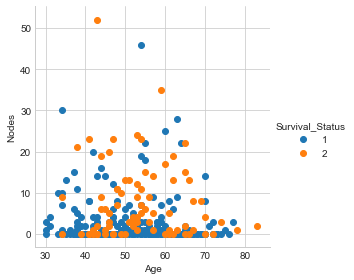

In [19]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Survival_Status", size=4) \
   .map(plt.scatter, "Age", "Nodes") \
   .add_legend();
plt.show();

We can use pair plots to view all the combinations. We can get 3c2 figues i.e, three figues. We are not able to classify the Survival Status using any of these pair plots

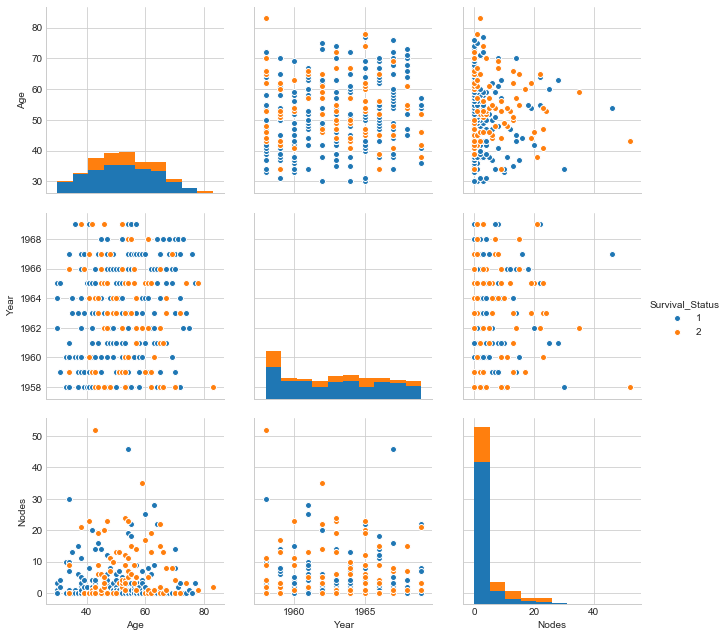

In [20]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status", size=3,vars=['Age','Year','Nodes']);
plt.show()